In [1]:
# cd to base directory of this repository to enable the loading of NEURON simulations
import os
os.chdir('/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim')
from neuron import h
from neurostim.cell import Cell
from neurostim.light_classes import LightSource, LightStimulation
from neurostim.utils import convert_polar_to_cartesian_xz, interpolate
from neurostim.polarmaps import get_AP_times, simple_polar_map
import pickle
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import Greys_r as cmap
from matplotlib.cm import Reds as Reds
import matplotlib
from neurostim.light_propagation_models import foutz_et_al2012
import pickle
import pandas as pd
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

# light source offsets displayed
ls_offsets = [0, 150, 300] #um
ls_offset = 0
light_powers = [5e-5, 3e-4, 5e-4, 2e-2]
#light_powers = [9e-3]

## light and neuron display
cortex_boundaries = { 
    'x': [0,1000],
    'y': [0,1000],
    'z': [-500,2000]
}
L1_x = 500
NA = 0.22
d__um = 200

N1_x = 500
N1_y = 500
scaling_neurons = 0.5
neuron_color = 'tab:blue'

# NEURON setup
h.load_file("stdrun.hoc")
h.cvode_active(1)
# load cell and create stimulation object
hoc_file = 'L5'
chanrhod_expression = 13e9
chanrhod_distribution = 'uniform'
cortical_depth = {'L5':1170}
    
cell = Cell(
    hoc_file="simneurostim/model/hoc/" + str(hoc_file) + ".hoc",
    cortical_depth=cortical_depth,
    ChR_soma_density=float(chanrhod_expression),
    ChR_distribution=str(chanrhod_distribution),
    rm_mech_from_secs=None,
    delete_all_secs_except_soma=False
)
stimulation_intensities_mWPERmm2 = np.array(light_powers)*1000 / (d__um/1000/2)**2 / np.pi # lp[mW]/(radius [mm])**2 / PI
print('stimulation intensity in mW/mm2')
for lp, si in zip(light_powers, stimulation_intensities_mWPERmm2):
    print(str(lp)+'->'+str(np.round(si,2)))

	1 
	1 
	1 
	1 
stimulation intensity in mW/mm2
5e-05->1.59
0.0003->9.55
0.0005->15.92
0.02->636.62


In [2]:
h.dend11[75].x3d(0)

87.84185791015625

In [3]:
h.dend11[75].y3d(4)

177.7890167236328

In [4]:
np.sqrt(100**2+150**2)

180.27756377319946

In [5]:
convert_polar_to_cartesian_xz(150, np.pi/3)

(75.00000000000001, 129.9038105676658)

In [6]:
#for sec in h.allsec():
#    if sec.z3d(1)>-100:
#        print(sec.name())        
#                

In [7]:
# dimensions (A4:  8.27 x 11.69 inches)
text_frac = 0.8
abs_pw = 8.27 # pagewidth
abs_pl = 11.69 # pagelength
pw = text_frac * abs_pw
pl = text_frac * abs_pl

# others
dpi=900

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim/simneurostim/base-neurostim/neurostim/cell.py:617: RuntimeWarning: invalid value encountered in true_divide
  a = (data - clim[0])/(clim[1]-clim[0])


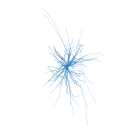

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


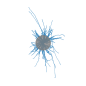

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


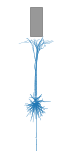

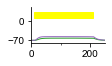

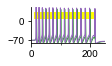

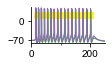

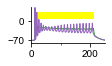

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim/simneurostim/base-neurostim/neurostim/cell.py:617: RuntimeWarning: invalid value encountered in true_divide
  a = (data - clim[0])/(clim[1]-clim[0])


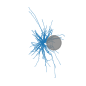

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


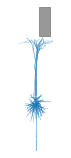

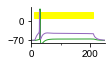

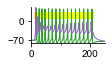

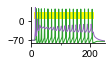

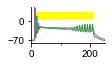

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


/home/david/Projects/optogenetic_whole_cell_activation/morph_impact_on_opt_stim/simneurostim/base-neurostim/neurostim/cell.py:617: RuntimeWarning: invalid value encountered in true_divide
  a = (data - clim[0])/(clim[1]-clim[0])


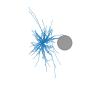

----------------------------------------------------------------------------------------------------
DATA RANGE:  1.0 1.0


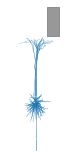

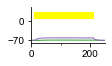

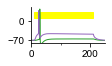

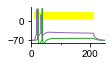

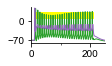

1


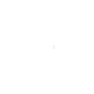

1


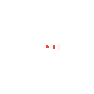

1


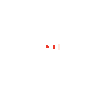

1


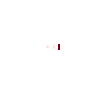

In [8]:
# top view on neuron
length = pw/3
width = pw/3
fig = plt.figure(constrained_layout=False, figsize=(width,length))
gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=1, wspace=0)
ax1 = fig.add_subplot(gs[0,0])

collectionL5_top = cell.plot_foutz2012(
    func=lambda x:1, axes='xy',scaling = scaling_neurons, segfunc=False, clim=None,cmap=None,color=neuron_color, shift_x=N1_x, shift_y=N1_y, alpha=0.5)
ax1.add_collection(collectionL5_top)
# rectangle for scaling
#rectangle = plt.Rectangle((500,600), 50, 200,color='tab:gray',alpha=0.8, edgecolor=None)
#ax1.add_patch(rectangle)
ax1.set_xlim(*cortex_boundaries['x'])
ax1.set_ylim(*cortex_boundaries['y'])
# turn axes off for neuron and light 6isplay
ax1.set_axis_off()
ax1.set_aspect('equal')
fig.savefig('paper/NEW_FIGURES/FIG2/plots/neuron_top.png', dpi=dpi, 
            facecolor=None, edgecolor=None,  
            bbox_inches='tight')
plt.show()

# simulations for different light source offset
APCs = dict()
for ls_offset in ls_offsets:
    APCs[ls_offset] = dict()
    # top view neuron and light source positions plots
    length = pw/5
    width = pw/5
    fig = plt.figure(constrained_layout=False, figsize=(width,length))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=1, wspace=0)
    ax1 = fig.add_subplot(gs[0,0])
    collectionL5_top = cell.plot_foutz2012(
        func=lambda x:1, axes='xy',scaling = scaling_neurons, segfunc=False, clim=None,cmap=None,color=neuron_color, shift_x=N1_x, shift_y=N1_y)
    ax1.add_collection(collectionL5_top)
    # plot light source
    circle1 = plt.Circle((500+ls_offset, 500), d__um/2, color='tab:gray',zorder=2,alpha=0.8, edgecolor=None)
    ax1.add_patch(circle1)
    ax1.set_xlim(*cortex_boundaries['x'])
    ax1.set_ylim(*cortex_boundaries['y'])
    # turn axes off for neuron and light display
    ax1.set_axis_off()
    ax1.set_aspect('equal')
    fig.savefig('paper/NEW_FIGURES/FIG2/plots/neuron_light_top_'+str(ls_offset)+'.png', dpi=dpi, 
                facecolor=None, edgecolor=None,  
                bbox_inches='tight')
    plt.show()
    
    # side view
    # side view neuron and light position plots
    length = 2 * pw/5
    width = pw/5
    fig = plt.figure(constrained_layout=False, figsize=(width,length))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=1, wspace=0)
    ax1 = fig.add_subplot(gs[0,0])


    # light source
    length_light_source = 500
    rectangle = plt.Rectangle((500+ls_offset-d__um/2, 0), d__um, length_light_source,color='tab:gray',alpha=0.8, edgecolor=None)
    ax1.add_patch(rectangle)

    # Foutz optical fiber light source
    xx, zz = np.meshgrid(np.arange(cortex_boundaries['x'][0],cortex_boundaries['x'][1]),
                         np.arange(cortex_boundaries['z'][0],cortex_boundaries['z'][1]))
    L1_prof = foutz_et_al2012(
        x=xx-L1_x-ls_offset, y=np.zeros(np.shape(xx)), z=zz, power=1, 
        width=d__um, NA=NA)
    # for LogNorm set all 0 to 1e-10
    L1_prof[L1_prof==0] = 1e-10
    # normalize light_profile by average output intensity
    # 1W/cm2 light power / (pi * diam_in_cm/2)**2
    avrg_output_intensity = 1 / (np.pi * (d__um/2 * 1e-4)**2)
    L1_prof /= avrg_output_intensity
    # set light above z=0 to max to get white profile
    L1_prof [0:500,:]=np.max(L1_prof)
    # display 500 um bar for scale
    #L1_prof[300:800,770:800]=np.max(L1_prof)
    #L1_prof[770:800,300:800]=np.max(L1_prof)

    # add cortical layer boundaries
    cortical_layer_boundaries = -1*cortex_boundaries['z'][0] + np.array([0, 150, 630, 950, 1200, 1520])
    for bound in cortical_layer_boundaries:
        L1_prof[bound:bound+2,:] = np.max(L1_prof)

    collectionL5_side = cell.plot_foutz2012(
        func=lambda x:1, axes='xz',scaling = scaling_neurons, segfunc=False, clim=None,cmap=None,color=neuron_color, shift_x=N1_x)

    ax1.add_collection(collectionL5_side)
    bounds_cmap = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
    mappable = ax1.pcolormesh(xx,zz*-1,L1_prof, shading='nearest', cmap=cmap,
                  #norm=LogNorm(vmin=6300e-4,vmax=63000)
                  norm=BoundaryNorm(bounds_cmap,ncolors=cmap.N,extend='both')
    )
    #ax1.set_xlim(*cortex_boundaries['x']) 
    #ax1.set_ylim(-1*(cortex_boundaries['x'][1]-cortex_boundaries['x'][0]),0)
    ax1.set_xlim(*cortex_boundaries['x'])
    ax1.set_ylim(-1*cortex_boundaries['z'][1],-1*cortex_boundaries['z'][0])
    #ax1.set_ylim(-2000,500)
    # turn axes off for neuron and light display
    ax1.set_axis_off()
    ax1.set_aspect('equal')
    fig.savefig('paper/NEW_FIGURES/FIG2/plots/neuron_light_side_'+str(ls_offset)+'.png', dpi=dpi, 
                facecolor=None, edgecolor=None,  
                bbox_inches='tight')
    plt.show()
    
    # voltage traces
    # define interesting sections to measure (soma always included)
    extra_rec_var_names = ['V_dend11[62]', 'V_dend5[0]'] # apdend, soma, badend 
    #extra_rec_var_pointers = [h.dend11[62](0.5)._ref_v, h.dend5[0](0.5)._ref_v]       
    extra_rec_var_pointers = [h.dend11[75](0.5)._ref_v, h.dend5[0](0.5)._ref_v]
    
    for lp in light_powers:
        light_model = 'foutz_et_al2012'

        light_delay = 10
        light_duration = 200
        tot_rec_time = 250

        AP_threshold = 0 # mV
        interpol_dt = 0.1

        display_left_spines = True
        display_legend = False
        chanrhod_distribution = 'uniform'
        radius = ls_offset
        angle = np.pi/4

        # simulate
        light_x, light_y = convert_polar_to_cartesian_xz(radius, angle)
        #if ls_offset == 150:
        #    light_x = 110
        #    light_y = 160
        light_z = 0  # cortical surface
        light_pos = (light_x, light_y, light_z)
        light_source = LightSource(
            model=str(light_model),
            position=(light_x, light_y, light_z),
            width=d__um,
            NA=NA
        )
        light_stim = LightStimulation(
            cell=cell,
            light_source=light_source,
            delay=float(light_delay),
            duration=float(light_duration),
            light_power=float(lp),
            record_all_segments=False,
        )
        # perform stimulation and record data
        measurement = pd.DataFrame(
            light_stim.simulate_and_measure(
                tot_rec_time=float(tot_rec_time),
                extra_rec_var_names=extra_rec_var_names,
                extra_rec_var_pointers=extra_rec_var_pointers,
            )
        )
        # drop full row duplicates:
        measurement = measurement.drop_duplicates()
        # add 1e-12 ms to 2nd entry of 2 entries with the same time but different values
        measurement.loc[measurement["time [ms]"].diff() == 0, "time [ms]"] += 1e-12
        measurement = interpolate(
            df=measurement, interpolation_dt=float(interpol_dt)
        )
        AP_times = get_AP_times(
            df=measurement,
            interpol_dt=float(interpol_dt),
            t_on=float(light_delay),
            AP_threshold=AP_threshold
        )
        fig, ax = plt.subplots(figsize=(pw/5,pw/10))
        for var, label in zip(['V_soma(0.5)', 'V_dend11[62]', 'V_dend5[0]'],['soma','apical','basal']):
            if label == 'soma':
                ax.plot(measurement['time [ms]'], measurement[var], label=label,lw=1, c='tab:green')
                rectangle = plt.Rectangle((10,10), 200, 20,color='#ffff00ff',alpha=1, edgecolor=None)
                ax.add_patch(rectangle)
                #ax.set_ylabel('mV')
                #ax.set_xlabel('time [ms]')
            if label=='apical':
                    ax.plot(measurement['time [ms]'], measurement[var], label=label,lw=1, c='tab:purple')

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        #ax.spines['left'].set_visible(False)
        #ax.spines['bottom'].set_visible(False)
        ax.set_yticks([-70,0])
        #ax.set_yticklabels(['-70','0 ms'])
        ax.set_ylim(-80,50)
        ax.set_xlim(0,250)
        ax.set_xticks([0,200])
        #ax.set_xticklabels(['0','200 ms'])
        ax.set_xticks([100], minor=True)

        if display_legend:
            ax.legend()

        fig.savefig(
                '_'.join(['paper/NEW_FIGURES/FIG2/plots/voltage_prof_L5',str(ls_offset),str(lp),'.png']),
                dpi=dpi,
                facecolor=None, 
                edgecolor=None,
                bbox_inches='tight')
        plt.show()
        n_AP = len(AP_times)
        if n_AP == 0:
            # set to NaN if zero for plotting reasons
            n_AP = np.nan
        APCs[ls_offset][lp] = n_AP

def spatial_response_illustr(ls_offset, APC, lp):
        if type(lp) != list:
            lp = [lp]
        if type(ls_offset) != list:
            ls_offset = [ls_offset]
        if type(APC) != dict:
            APC = dict(ls_offset=dict(lp=APC))
        radii = np.arange(0,1000,25)
        angles = np.arange(0,2*np.pi,np.pi/8)
        rr, angang = np.meshgrid(radii, angles)
        df = pd.DataFrame(columns=['radius [um]', 'angle [rad]', 'AP_count'], dtype=float).set_index(['radius [um]', 'angle [rad]'])
        for r, ang in zip(rr.flatten(), angang.flatten()):
            df.loc[(r,ang),'AP_count'] = np.nan
        # fill simulated values:
        for lp_ in lp:
            for ls_offset_ in ls_offsets:
                if ls_offset_ ==0:
                    print(1)
                    for ang_ in angles:
                        df.loc[(ls_offset_,ang_),'AP_count'] = APC[ls_offset_][lp_]
                else:
                    df.loc[(ls_offset_,0),'AP_count'] = APC[ls_offset_][lp_]
        fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
        gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                                wspace=0.05)
        ax = fig.add_subplot(gs[0,0], projection="polar")
        ax, mappable = simple_polar_map(
            data=df.reset_index(),
            plot_col='AP_count',
            cmap= Reds,
            ax=ax,
            vmin=0,
            vmax=27)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.spines['polar'].set_visible(False)
        ax.grid()
        fig.savefig('paper/NEW_FIGURES/FIG2/plots/spatial_response_L5_'+str(ls_offset)+'_'+str(lp)+'.png', dpi=dpi, 
                    facecolor=None, edgecolor=None,  
                    bbox_inches='tight')
        plt.show()
for lp in light_powers:
    spatial_response_illustr(ls_offsets, APCs, lp)

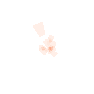

8.0


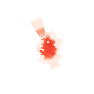

17.0


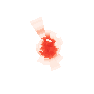

18.0


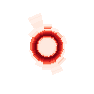

26.0


In [9]:
# pre-simulated full spatial profiles
#L5_data = pd.read_pickle('data/2022-08-04_L5/all_data.pickle')
L5_data = pd.read_hdf('data/2023-05-29_FIG2B/all_data.hdf')

# select relevant data from data frame
#ChR_expr_lvl = 10354945 # this is 130um-2 at soma for uniform distrib
chanrhod_expression = 13e9
chanrhod_distribution = 'uniform'
# light model and params
light_model = 'foutz_et_al2012'
diam = 200
NA = 0.22 
# other
stim_duration = 200 # ms
# apply selection
L5_data = L5_data.loc['L5',light_model,chanrhod_distribution,
                      chanrhod_expression,diam, NA, stim_duration]
# mask all values at 0 to be displayed white
L5_data.loc[L5_data.AP_count==0] = np.nan
#light_powers = [0.009]
for lp in light_powers:
    # L5
    fig = plt.figure(constrained_layout=False, figsize=(pw/4.5,pw/4.5))
    gs = fig.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.95,
                            wspace=0.05)
    ax = fig.add_subplot(gs[0,0], projection="polar")
    ax, mappable = simple_polar_map(
        data=L5_data.loc[lp].reset_index(),
        plot_col='AP_count',
        cmap= Reds,
        ax=ax,
        vmin=0,
        vmax=27)
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.spines['polar'].set_visible(False)
    ax.grid()
    fig.savefig('paper/NEW_FIGURES/FIG2/plots/full_spatial_response_L5_'+str(lp)+'.png', dpi=dpi, 
                facecolor=None, edgecolor=None,  
                bbox_inches='tight')
    plt.show()
    print(L5_data.loc[lp].AP_count.max())

In [10]:
L5_data.reset_index()['angle [rad]'].unique()
L5_data.reset_index()['radius [um]'].unique()

array([  0,  25,  50,  75, 100, 125, 150, 175, 200, 225, 250, 275, 300,
       325, 350, 375, 400, 425, 450, 475, 500, 525, 550, 575, 600, 625,
       650, 675, 700, 725, 750, 775, 800, 825, 850, 875, 900, 925, 950,
       975])

In [11]:
np.pi/8

0.39269908169872414

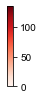

In [12]:
fig, ax = plt.subplots(figsize=(pw/30, pw/4.5))
plt.colorbar(mappable, cax=ax, ticks=[])
#fig.savefig('paper/NEW_FIGURES/FIG2/plots/colorbar.png', dpi=dpi, 
#                facecolor=None, edgecolor=None,  
#                bbox_inches='tight')
fig, ax = plt.subplots(figsize=(pw/60, pw/4.5))
ticks = [0,10,20]
ticks_labels_Hz = [str(int(tick)) for tick in np.array(ticks)/0.2]
cbar = plt.colorbar(mappable, cax=ax, ticks=ticks)
cbar.set_ticklabels(ticks_labels_Hz)
#fig.savefig('paper/NEW_FIGURES/FIG2/plots/colorbar_w_ticks.png', dpi=dpi, 
#               facecolor=None, edgecolor=None, 
#                bbox_inches='tight')


In [13]:
'done'

'done'